In [ ]:
from google.colab import files
uploaded = files.upload()

Saving historical_data.csv to historical_data.csv
Saving fear_greed_index.csv to fear_greed_index.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
trader_df = pd.read_csv('historical_data.csv')
sentiment_df = pd.read_csv('fear_greed_index.csv')
print("Trader Data Head")
display(trader_df.head())
print("Sentiment Data Head:")
display(sentiment_df.head())

Trader Data Head


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


Sentiment Data Head:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [ ]:
trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], format='%d-%m-%Y %H:%M')
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])
trader_df['date_only'] = trader_df['Timestamp IST'].dt.date
sentiment_df['date_only'] = sentiment_df['date'].dt.date
merged_df = pd.merge(trader_df, sentiment_df, on='date_only', how='left')
merged_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Order ID,Crossed,Fee,Trade ID,Timestamp,date_only,timestamp,value,classification,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02


In [ ]:
#Analysis
print(merged_df.groupby('classification')['Closed PnL'].mean())
print(merged_df['classification'].value_counts())

classification
Extreme Fear     34.537862
Extreme Greed    67.892861
Fear             54.290400
Greed            42.743559
Neutral          34.307718
Name: Closed PnL, dtype: float64
classification
Fear             61837
Greed            50303
Extreme Greed    39992
Neutral          37686
Extreme Fear     21400
Name: count, dtype: int64


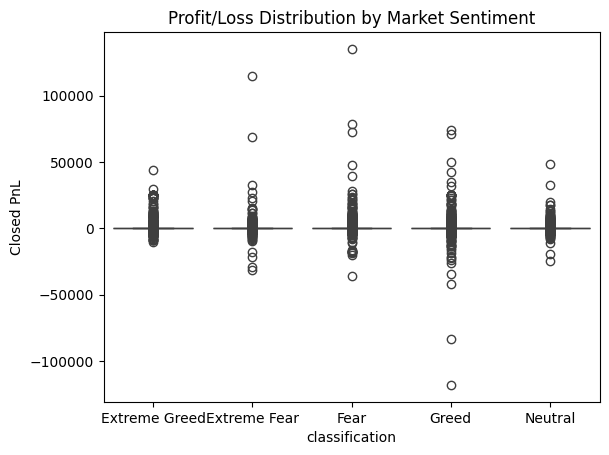

In [ ]:
#Visualization
sns.boxplot(x='classification', y='Closed PnL', data=merged_df)
plt.title('Profit/Loss Distribution by Market Sentiment')
plt.show()

In [ ]:
#Analyze profit by side and sentiment
profitability_by_side_sentiment = merged_df.groupby(['classification', 'Side'])['Closed PnL'].mean()
print(profitability_by_side_sentiment)

classification  Side
Extreme Fear    BUY      34.114627
                SELL     34.980106
Extreme Greed   BUY      10.498927
                SELL    114.584643
Fear            BUY      63.927104
                SELL     45.049641
Greed           BUY      25.002302
                SELL     59.691091
Neutral         BUY      29.227429
                SELL     39.456408
Name: Closed PnL, dtype: float64


In [ ]:
#Analyze profit by trade direction and sentiment
profitability_by_direction_sentiment = merged_df.groupby(['classification', 'Direction'])['Closed PnL'].mean()
print(profitability_by_direction_sentiment)

classification  Direction                
Extreme Fear    Buy                              0.000000
                Close Long                      81.197371
                Close Short                    123.400238
                Long > Short                     1.331956
                Open Long                        0.000000
                Open Short                       0.000000
                Sell                          -135.021730
                Short > Long                 -1932.516940
                Spot Dust Conversion             0.000000
Extreme Greed   Buy                              0.000000
                Close Long                      61.830783
                Close Short                     28.970490
                Long > Short                   120.600968
                Open Long                        0.000000
                Open Short                       0.000000
                Sell                           290.572354
                Short > Long  

In [ ]:
#Analyze profit by coin and sentiment
profitability_by_coin_sentiment = merged_df.groupby(['classification', 'Coin'])['Closed PnL'].mean()
print(profitability_by_coin_sentiment)

classification  Coin  
Extreme Fear    @10       -0.031742
                @107     -89.588788
                @13       -0.061895
                @142      15.529335
                @16       -0.030214
                            ...    
Neutral         kBONK      0.896872
                kFLOKI     4.083950
                kNEIRO    -2.840308
                kPEPE     -0.951026
                kSHIB      0.526700
Name: Closed PnL, Length: 724, dtype: float64
